# Checkpoint 1: Data Cleaning 1

In [765]:
import pandas as pd
import numpy as np

In [766]:
# Load companies data
companies = pd.read_csv('companies.txt', sep='\t', encoding='iso-8859-1')

In [767]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB


From results above we can conclude following points about companies data

1) Total Row Count is 66368 having index from 0 to 66367

2) Total Column Count is 10


In [768]:
companies.nunique()

permalink        66368
name             66102
homepage_url     61191
category_list    27296
status               4
country_code       137
state_code         311
region            1092
city              5111
founded_at        3978
dtype: int64

From results above we can conclude following points about companies data

1) Unique 'permalink' count is equal to total rows count


In [769]:
companies.apply(lambda x: (100* (x.isnull().sum()/ len(companies.index))).round(2))

permalink         0.00
name              0.00
homepage_url      7.62
category_list     4.74
status            0.00
country_code     10.48
state_code       12.88
region           12.10
city             12.10
founded_at       22.93
dtype: float64

Column wise percentage of missing data.

'founded_at' column have most missing data 22.93%
  

In [770]:
# Dropping founded_at column
companies.drop(labels=['founded_at'], inplace=True, axis=1)

In [771]:
# Load rounds2 data
rounds2 = pd.read_csv('rounds2.csv', encoding='iso-8859-1')

In [772]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


From results above we can conclude following points about rounds2 data

1) Total Row Count is 114949 having index from 0 to 114948

2) Total Column Count is 6

In [773]:
rounds2.nunique()

company_permalink           90247
funding_round_permalink    114949
funding_round_type             14
funding_round_code              8
funded_at                    5033
raised_amount_usd           22095
dtype: int64

From results above we can conclude following points about companies data

1) Unique 'funding_round_permalink' count is equal to total rows count

In [774]:
rounds2.apply(lambda x: (100* (x.isnull().sum()/ len(rounds2.index))).round(2))

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

Column wise percentage of missing data.

'funding_round_code' column have most missing data 72.91%

In [775]:
# Dropping funding_round_code column
rounds2.drop(labels=['funding_round_code'], inplace=True, axis=1)

In [776]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0


As per description, company_permalink column has Unique ID of company.

Also from sample data above we can see few data in company_permalink column is repeated just with change in upper to lower case

So we will convert 'company_permalink' data in same case, we choose upper case

In [777]:
# Converting all 'company_permalink' data in upper case
rounds2.company_permalink =  rounds2.company_permalink.map(lambda x: x.upper())

# How many unique companies are present in rounds2?

In [778]:
rounds2.company_permalink.nunique()

66370

# How many unique companies are present in companies?


In [779]:
companies.permalink.nunique()

66368

# In the companies data frame, which column can be used as the unique key for each company? Write the name of the column.

As we can see no. of unique values in 'permalink' column is same as total no. of rows in companies. 

So we can treat 'permalink' as unique column for companies data frame.

# Are there any companies in the rounds2 file which are not present in companies?

We will change the companies_permalink and permalink in rounds2 and companies dataframe to upper case to avoid any duplicacy issues

In [780]:
rounds2.company_permalink =  rounds2.company_permalink.map(lambda x: x.upper())
companies.permalink = companies.permalink.map(lambda x: x.upper())


In [781]:
companies[~companies.permalink.isin(rounds2.company_permalink)].count()

permalink        5
name             5
homepage_url     3
category_list    3
status           5
country_code     0
state_code       0
region           0
city             0
dtype: int64

In [782]:
rounds2[~rounds2.company_permalink.isin(companies.permalink)].count()

company_permalink          7
funding_round_permalink    7
funding_round_type         7
funded_at                  7
raised_amount_usd          1
dtype: int64

# Our cross validation from both the data frame suggests that there 5 and 7 companies in the rounds2 file which are not present in companies and vice versa

# Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame.
# Name the merged frame master_frame.

To merge we need a common key column, which is permalink in our case, we need to rename rounds2.companies_permalink to permalink

In [783]:
rounds2 = rounds2.rename(columns={'company_permalink':'permalink'})

We need all data from rounds2 so it would be a left join

In [784]:
master_frame = rounds2.merge(companies, on='permalink', how='left')


# How many observations are present in master_frame?


In [785]:
len(master_frame.index)

114949

# Checkpoint 2: Funding Type Analysis

#  Average Values of Investments for Each of these Funding Types

In [786]:
groupedMean = master_frame.groupby(by='funding_round_type')['raised_amount_usd'].mean().round(1)                                                                               

In [787]:

groupedMean.loc[['venture','angel','seed','private_equity']]

funding_round_type
venture           11748949.1
angel               958694.5
seed                719818.0
private_equity    73308593.0
Name: raised_amount_usd, dtype: float64

# Which investment type is the most suitable for Spark Funds based on criteria of 5 to 15 million USD per investment round

In [788]:
groupedMean[((groupedMean > 5000000) & (groupedMean < 15000000))]

funding_round_type
venture    11748949.1
Name: raised_amount_usd, dtype: float64

 For further analysis, filter the data so it only contains the chosen investment type.

In [789]:
master_frame = master_frame[master_frame['funding_round_type'] == 'venture']   

# Checkpoint 3: Country Analysis

# Top nine countries which have received the highest total funding

In [790]:
countryWiseTotalRaisedAmount = master_frame.groupby(by='country_code')['raised_amount_usd'].sum()
top9 = pd.DataFrame(countryWiseTotalRaisedAmount.sort_values(ascending=False)[0:9])

In [791]:
top9

,raised_amount_usd
country_code,
USA,4.225108e+11
CHN,3.983542e+10
GBR,2.024563e+10
IND,1.439186e+10
CAN,9.583332e+09
FRA,7.259537e+09
ISR,6.907515e+09
DEU,6.346960e+09
JPN,3.363677e+09


# Identify the top three English-speaking countries in the data frame top9.

Analysing the Top 3 English-Speaking Countries from the PDF of Englist Speaking Country

Top 3 countries are

1) USA

2) GBR

3) IND


# Checkpoint 4: Sector Analysis 1

In [792]:
# Load mapping data
mapping = pd.read_csv('mapping.csv', encoding='iso-8859-1')

In [793]:
mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
category_list                              687 non-null object
Automotive & Sports                        688 non-null int64
Blanks                                     688 non-null int64
Cleantech / Semiconductors                 688 non-null int64
Entertainment                              688 non-null int64
Health                                     688 non-null int64
Manufacturing                              688 non-null int64
News, Search and Messaging                 688 non-null int64
Others                                     688 non-null int64
Social, Finance, Analytics, Advertising    688 non-null int64
dtypes: int64(9), object(1)
memory usage: 53.8+ KB


From results above we can conclude following points about companies data

1) Total Row Count is 688 having index from 0 to 667

2) Total Column Count is 10

3) category_list have only 687 objects, i.e it contains missing values

In [794]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [795]:
# Drop missing values from mapping
mapping.dropna(inplace=True)

In [796]:
# Droping Blanks column as we have no concrete data availabe for this column, that has any value
mapping.drop(labels='Blanks', inplace=True, axis=1)

In [797]:
# We can see na is replaced by 0 Ex- Analyst is represented as A0lyst in category_list column
# Fixing this 
mapping['category_list'] = mapping['category_list'].str.replace('0', 'na')

In [798]:
# Before going further lets add a data frame of main sectors corresponding to its category_list
primary_to_main = {}
primary = []
mainSector = []
for row in mapping.index:
    for col in mapping:
        if str(mapping.loc[row,col]) == '1':
            primary.append(str(mapping.loc[row,'category_list']))
            mainSector.append(str(col))          
    continue          
            


In [799]:
primary_to_main['category_list'] = primary
primary_to_main['mainSector'] = mainSector

In [800]:
primaryToMain = pd.DataFrame(primary_to_main)

# Merged data frame with each primary sector mapped to its main sector


In [801]:
primaryToMain.head()

,category_list,mainSector
0,3D,Manufacturing
1,3D Printing,Manufacturing
2,3D Technology,Manufacturing
3,Accounting,"Social, Finance, Analytics, Advertising"
4,Active Lifestyle,Health


In [802]:
# Extracting the primary sector of each category list from the category_list column
master_frame.category_list = master_frame.category_list.astype('str').apply(lambda x: x.split('|')[0])



# Checkpoint 5: Sector Analysis 2


In [803]:
# Before Moving further and finding out D1, D2, D3 for USA, IND and GRB. 
# We already filtured out venture for investment type




In [804]:
# Filtering on country_code
D1 =  master_frame[(master_frame['country_code'] == 'USA') & ((master_frame['raised_amount_usd'].astype('float') > 5000000) & (master_frame['raised_amount_usd'].astype('float') < 15000000))]
D2 =  master_frame[(master_frame['country_code'] == 'GBR') & ((master_frame['raised_amount_usd'].astype('float') > 5000000) & (master_frame['raised_amount_usd'].astype('float') < 15000000))]
D3 =  master_frame[(master_frame['country_code'] == 'IND') & ((master_frame['raised_amount_usd'].astype('float') > 5000000) & (master_frame['raised_amount_usd'].astype('float') < 15000000))]
  


In [805]:
D1 = D1.merge(primaryToMain, on='category_list', how='inner')
D2 = D2.merge(primaryToMain, on='category_list', how='inner')
D3 = D3.merge(primaryToMain, on='category_list', how='inner')

# Grouped Data for D1

In [806]:

mainSectorCount = D1.groupby(by=['mainSector'])['permalink'].count().to_frame()
mainSectorRaisedAmount = D1.groupby(by=['mainSector'])['raised_amount_usd'].sum().to_frame()
mainSectorCount.reset_index(inplace=True)
mainSectorRaisedAmount.reset_index(inplace=True)
groupedDataD1 = mainSectorRaisedAmount.merge(mainSectorCount, on='mainSector')
D1 = D1.merge(groupedDataD1, on='mainSector')

# Grouped Data for D2

In [807]:

mainSectorCount = D2.groupby(by=['mainSector'])['permalink'].count().to_frame()
mainSectorRaisedAmount = D2.groupby(by=['mainSector'])['raised_amount_usd'].sum().to_frame()
mainSectorCount.reset_index(inplace=True)
mainSectorRaisedAmount.reset_index(inplace=True)
groupedDataD2 = mainSectorRaisedAmount.merge(mainSectorCount, on='mainSector')
D2 = D2.merge(groupedDataD2, on='mainSector')

# Grouped Data for D3

In [808]:

mainSectorCount = D3.groupby(by=['mainSector'])['permalink'].count().to_frame()
mainSectorRaisedAmount = D3.groupby(by=['mainSector'])['raised_amount_usd'].sum().to_frame()
mainSectorCount.reset_index(inplace=True)
mainSectorRaisedAmount.reset_index(inplace=True)
groupedDataD3 = mainSectorRaisedAmount.merge(mainSectorCount, on='mainSector')
D3 = D3.merge(groupedDataD3, on='mainSector')

# Total number of investments (count)



In [809]:
groupedDataD1.permalink.sum()

9942

In [810]:
groupedDataD2.permalink.sum()

559

In [811]:
groupedDataD3.permalink.sum()

243

# Total number of investments (USD)


In [812]:
groupedDataD1.raised_amount_usd.sum()

88638294664.0

In [813]:
groupedDataD2.raised_amount_usd.sum()

4875228300.0

In [814]:
groupedDataD3.raised_amount_usd.sum()

2174543602.0

# Top sector (based on count of investments)

In [815]:
groupedDataD1.sort_values(by='permalink', ascending=False).head(3)

,mainSector,raised_amount_usd,permalink
6,Others,2.173601e+10,2423
7,"Social, Finance, Analytics, Advertising",1.939738e+10,2216
1,Cleantech / Semiconductors,1.780163e+10,1951


In [816]:
groupedDataD2.sort_values(by='permalink', ascending=False).head(3)

,mainSector,raised_amount_usd,permalink
6,Others,1.123624e+09,129
1,Cleantech / Semiconductors,1.110140e+09,124
7,"Social, Finance, Analytics, Advertising",9.744040e+08,118


In [817]:
groupedDataD3.sort_values(by='permalink', ascending=False).head(3)

,mainSector,raised_amount_usd,permalink
6,Others,703409507.0,78
7,"Social, Finance, Analytics, Advertising",385549550.0,45
5,"News, Search and Messaging",368834545.0,41


# Number of investments in top sector

Result above also displays the no. of investment in top sector 

So, Final Result is:

1) Country1 -> USA -> Others -> 2423

2) Country1 -> GBR -> Others -> 129

3) Country1 -> IND -> Others -> 78

# Number of investments in second sector

No. of investment in second sector 

So, Final Result is:

1) Country1 -> USA -> Social, Finance, Analytics, Advertising -> 2216

2) Country1 -> GBR -> Cleantech / Semiconductors -> 124

3) Country1 -> IND -> Social, Finance, Analytics, Advertising -> 45

# Number of investments in third sector

No. of investment in third sector 

So, Final Result is:

1) Country1 -> USA -> Cleantech / Semiconductors -> 1951

2) Country1 -> GBR -> Social, Finance, Analytics, Advertising -> 118

3) Country1 -> IND -> News, Search and Messaging -> 41

# Which company received the highest investment (top sector count-wise)

In [818]:
D1Other = D1[D1['mainSector'] == 'Others']
D1Other.sort_values(by='permalink_y', ascending=False)['permalink_x'].head(2)

2216     /ORGANIZATION/128-TECHNOLOGY
3826    /ORGANIZATION/SPECTRUM-BRIDGE
Name: permalink_x, dtype: object

In [819]:
D2Other = D2[D2['mainSector'] == 'Others']
D2Other.sort_values(by='permalink_y', ascending=False)['permalink_x'].head(2)

378          /ORGANIZATION/ACS-CLOTHING
443    /ORGANIZATION/ROOTSTOCK-SOFTWARE
Name: permalink_x, dtype: object

In [820]:
D3Other = D3[D3['mainSector'] == 'Others']
D3Other.sort_values(by='permalink_y', ascending=False)['permalink_x'].head(2)

23     /ORGANIZATION/21DIAMONDS-INDIA
72    /ORGANIZATION/AZURE-HOSPITALITY
Name: permalink_x, dtype: object

# Which company received the highest investment (top sector count-wise)


From the result above we can find out the same

# Checkpoint 6: Plots

# A plot for total investments (globally) in venture, seed, and private equity, and the average amount of investment in each funding type. 


In [821]:
# Merge rounds2 and companies to get master_frame
master_frame = rounds2.merge(companies, on='permalink', how='left')


In [822]:
fundingTypeFrame = master_frame[master_frame['funding_round_type'].isin(['venture', 'seed', 'private_equity'])]

In [823]:
fundingTypeSum = fundingTypeFrame.groupby(by='funding_round_type')['raised_amount_usd'].sum().to_frame()
totalSumRaised = master_frame.raised_amount_usd.sum()
fundingTypeSum.reset_index(inplace=True)
fundingTypeSum['raised_amount_fraction'] = fundingTypeSum['raised_amount_usd'] / totalSumRaised

In [824]:
fundingTypeSum

,funding_round_type,raised_amount_usd,raised_amount_fraction
0,private_equity,1.419254e+11,0.143341
1,seed,1.698986e+10,0.017159
2,venture,5.901262e+11,0.596012


In [825]:
fundingTypeMean = fundingTypeFrame.groupby(by='funding_round_type')['raised_amount_usd'].mean().to_frame()
fundingTypeMean.reset_index(inplace=True)

In [826]:
plot1DF = fundingTypeSum.merge(fundingTypeMean, on='funding_round_type', how='inner')

In [827]:
plot1DF.rename(columns={'raised_amount_usd_y':'raised_amount_mean'}, inplace=True)

# A plot showing the fraction of total investments (globally) in venture, seed, and private equity, and the average amount of investment in each funding type.

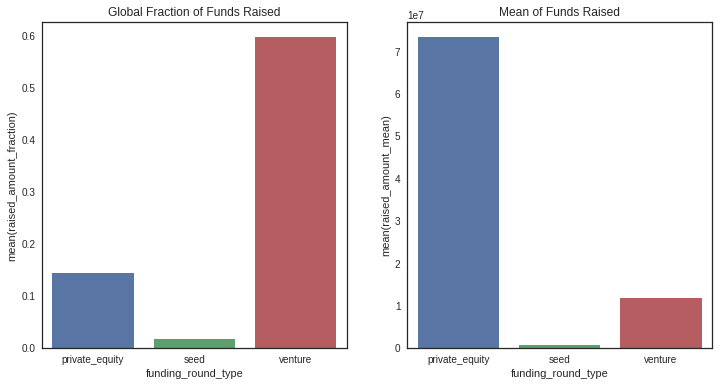

In [844]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="white")
# Create 2 subplots for mean and sum respectively

# increase figure size 
plt.figure(figsize=(12, 6))

# subplot 1: statistic=mean
plt.subplot(1, 2, 1)
sns.barplot(x='funding_round_type', y='raised_amount_fraction', data=plot1DF)
plt.title("Global Fraction of Funds Raised")

# subplot 2: statistic=sum
plt.subplot(1, 2, 2)
sns.barplot(x='funding_round_type', y='raised_amount_mean', data=plot1DF)
plt.title("Mean of Funds Raised")

plt.show()

# Plot showing the top 9 countries against the total amount of investments of funding type FT. 

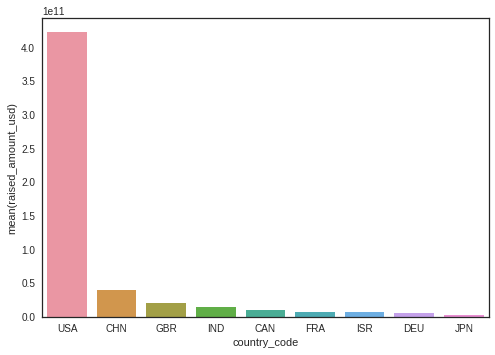

In [845]:
plot2df = pd.DataFrame(top9)
plot2df['country_code'] = plot2df.index
sns.barplot(y='raised_amount_usd',x='country_code',data=plot2df)
plt.show()

# A plot showing the number of investments in the top 3 sectors of the top 3 countries

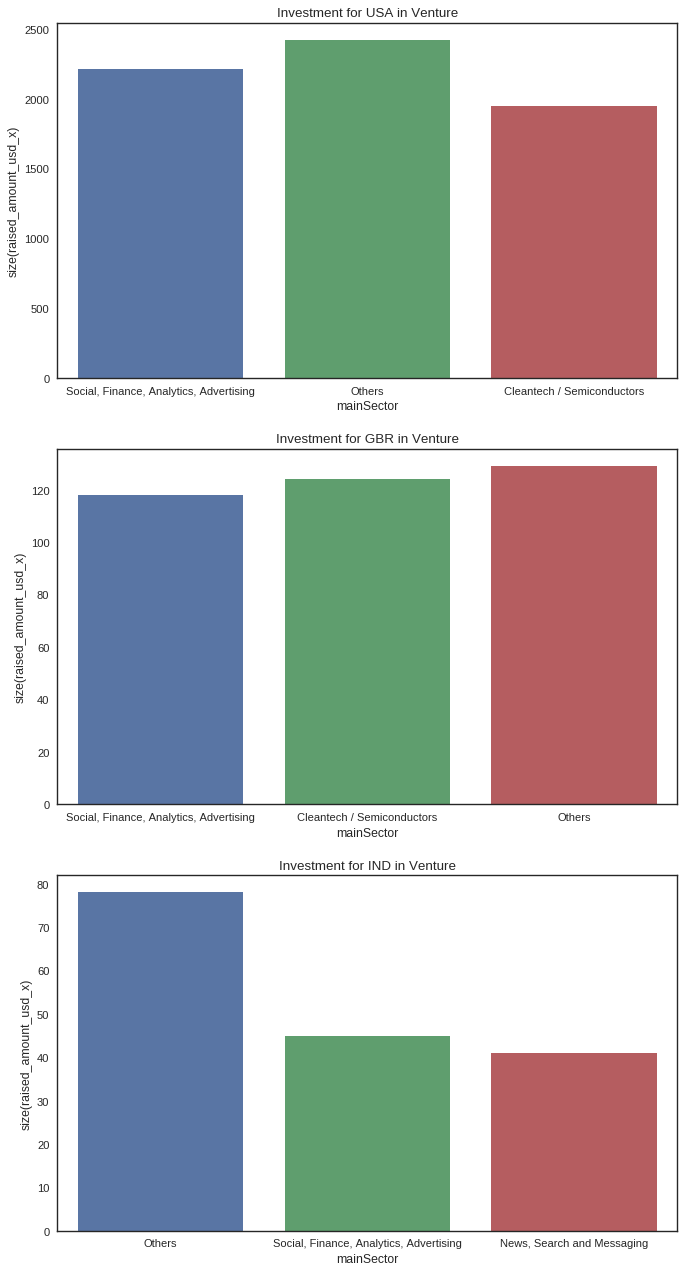

In [846]:
#Ploting the required in 3 subplots, one per country based upon top 3 sectors per country as obtained during Checkpoint 5
plt.figure(num=None, figsize=(10, 20), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(3, 1, 1)
sns.barplot(x='mainSector',y='raised_amount_usd_x',data=D1[D1['mainSector'].isin(['Others', 'Social, Finance, Analytics, Advertising', 'Cleantech / Semiconductors'])], estimator=np.size)
plt.title('Investment for USA in Venture')

plt.subplot(3, 1, 2)
sns.barplot(x='mainSector',y='raised_amount_usd_x',data=D2[D2['mainSector'].isin(['Others','Cleantech / Semiconductors','Social, Finance, Analytics, Advertising'])], estimator=np.size)
plt.title('Investment for GBR in Venture')

plt.subplot(3, 1, 3)
sns.barplot(x='mainSector',y='raised_amount_usd_x',data=D3[D3['mainSector'].isin(['Others', 'Social, Finance, Analytics, Advertising', 'News, Search and Messaging'])], estimator=np.size)
plt.title('Investment for IND in Venture')
plt.show()

# Thank You